## Introduction

This machine learning model is to design a scoring algorithm that will determine the loan approval based in the probability of whether the borrower will default. 

## Imports

Import all the necessary libraries and functions for the model.

In [258]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics 


# Import the Python machine learning libraries we need
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Import some convenience functions. 
from functions import *

## Read in Data

The data is already given. The following files will be used.
The train variable ("application_train.csv" file) will return a dataframe to be used for training and testing of the model.

In [259]:
train = pd.read_csv('Desktop/home-credit-default-risk/application_train.csv')
#test = pd.read_csv('Desktop/home-credit-default-risk/application_test.csv')

## Visualize Data

In [260]:
print('Data shape: ', train.shape)

Data shape:  (307511, 122)


In [261]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


The data has 307511 rows (data entry) and 122 columns (features/variables) including TARGET variable that we want to predict.

### Distribution of the TARGET column

In [262]:
train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:ylabel='Frequency'>

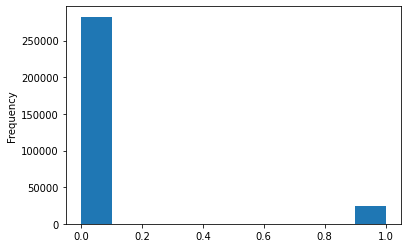

In [263]:
train['TARGET'].astype(int).plot.hist()

The data is highly imbalanced.

### Missing values 

In [264]:
missing_values_table(train).head(20)


Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


### Column types

In [265]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

__float64__ and __int64__ are numeric variables. __object__ are categorial variables which machine learning alorithims cannot handle.

### Correlations between TARGET and features

In [266]:
corr = train.corrwith(train["TARGET"]).abs().sort_values()
corr.tail(10)

REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
EXT_SOURCE_1                   0.155317
EXT_SOURCE_2                   0.160472
EXT_SOURCE_3                   0.178919
TARGET                         1.000000
dtype: float64

In [267]:
corr.head(40)

FLAG_DOCUMENT_20                0.000215
FLAG_DOCUMENT_5                 0.000316
FLAG_CONT_MOBILE                0.000370
FLAG_MOBIL                      0.000534
FLAG_DOCUMENT_12                0.000756
AMT_REQ_CREDIT_BUREAU_WEEK      0.000788
AMT_REQ_CREDIT_BUREAU_HOUR      0.000930
FLAG_DOCUMENT_19                0.001358
FLAG_DOCUMENT_10                0.001414
FLAG_DOCUMENT_7                 0.001520
NONLIVINGAPARTMENTS_MODE        0.001557
FLAG_EMAIL                      0.001758
AMT_REQ_CREDIT_BUREAU_QRT       0.002022
SK_ID_CURR                      0.002108
FLAG_DOCUMENT_4                 0.002672
AMT_REQ_CREDIT_BUREAU_DAY       0.002704
NONLIVINGAPARTMENTS_MEDI        0.002757
LIVE_REGION_NOT_WORK_REGION     0.002819
NONLIVINGAPARTMENTS_AVG         0.003176
FLAG_DOCUMENT_17                0.003378
FLAG_DOCUMENT_21                0.003709
AMT_INCOME_TOTAL                0.003982
FLAG_DOCUMENT_11                0.004229
FLAG_DOCUMENT_9                 0.004352
FLAG_DOCUMENT_2 

In [268]:
types = np.array([z for z in train.dtypes])        # array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O') ...])
all_columns = train.columns.values                 # list of all column names
is_num = types != 'object'                           # returns array([False, False, False, False,  True,  True, ...) where True is a numeric variable
num_features = all_columns[is_num].tolist()          # list of all numeric columns
cat_features = all_columns[~is_num].tolist()         # list of all categorical columns

print(len(num_features), "numeric features")
print(len(cat_features), "categorical features")

106 numeric features
16 categorical features


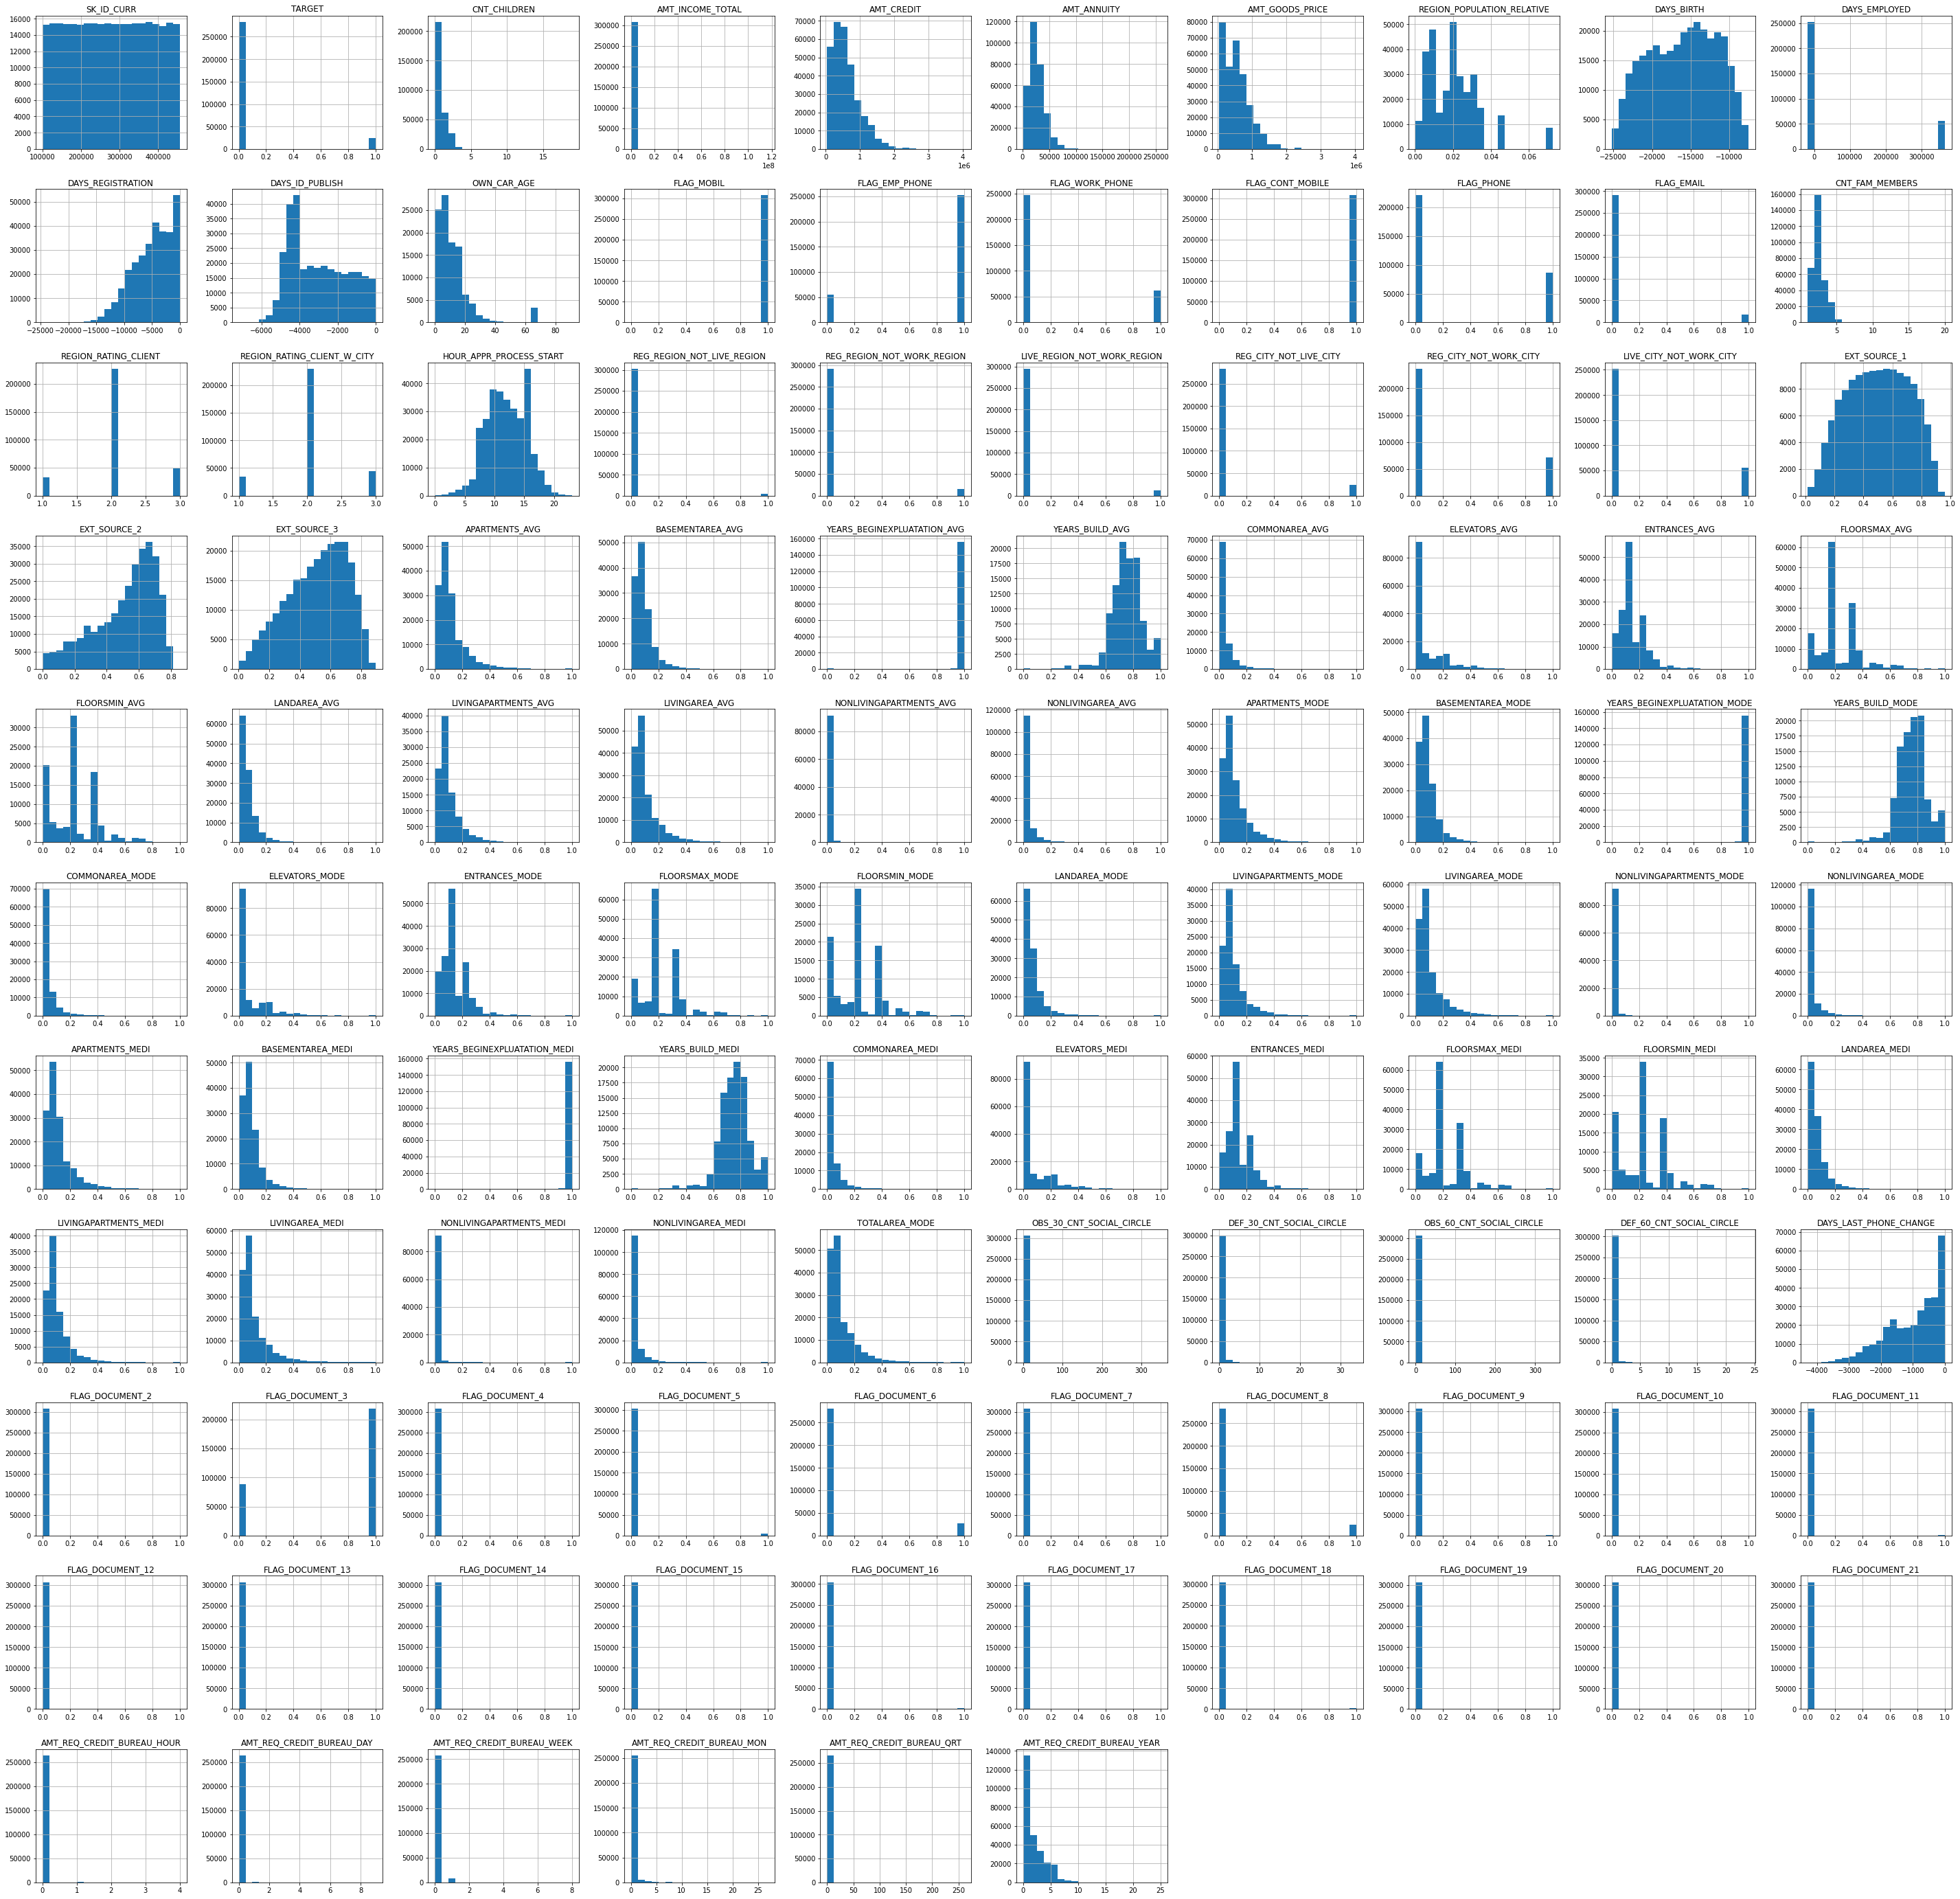

In [269]:
train[num_features].hist(bins=20, figsize=(50, 50))
plt.show()

### Outliers

In [270]:
(train["DAYS_BIRTH"]/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [271]:
train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

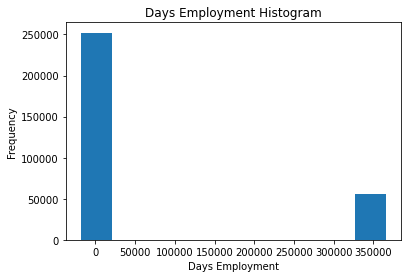

In [272]:
train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

There are anomalous values, which are __365243__, in the __DAYS_EMPLOYED__ column.

## Prepare Data

### Replace anomalous values/outliers

In [273]:
train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

### Drop features with poor correlation

In [274]:
#AMT_TOTAL_INC = train['AMT_TOTAL_INCOME']
#train.drop(corr.head(38).index, axis=1, inplace=True, errors='ignore')
#train['AMT_TOTAL_INCOME'] = AMT_TOTAL_INC

## Feature engineering


### Log Transformation

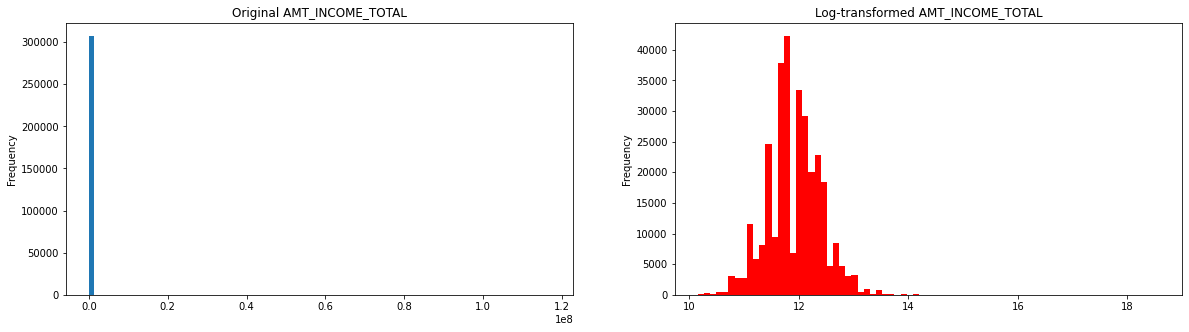

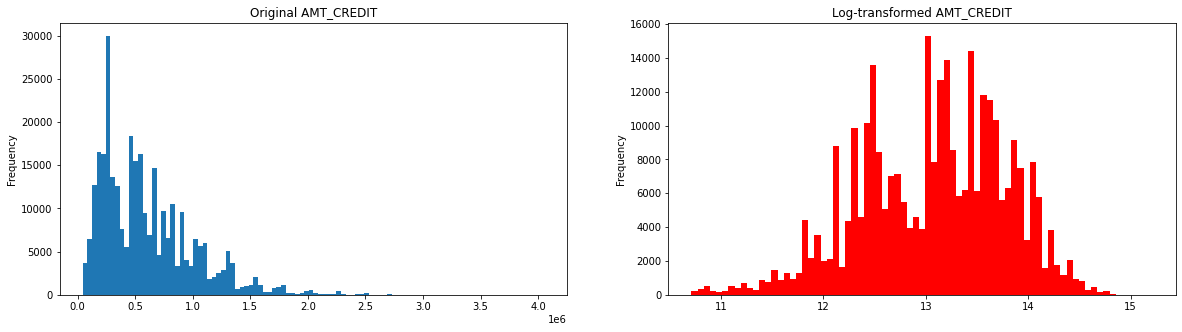

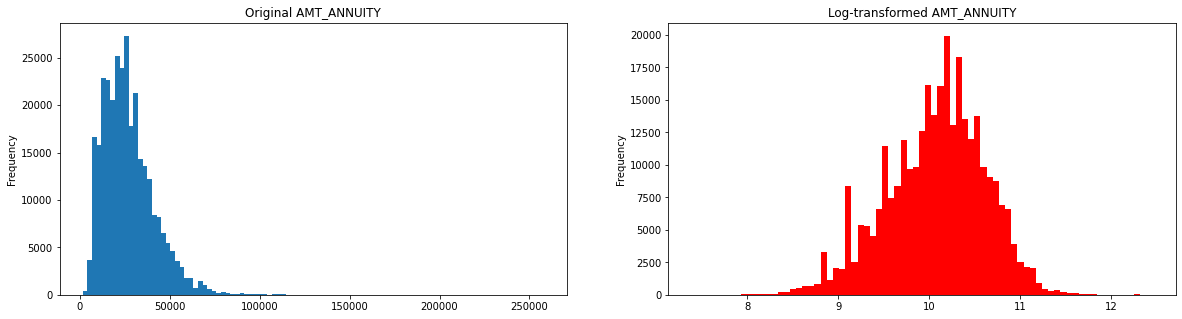

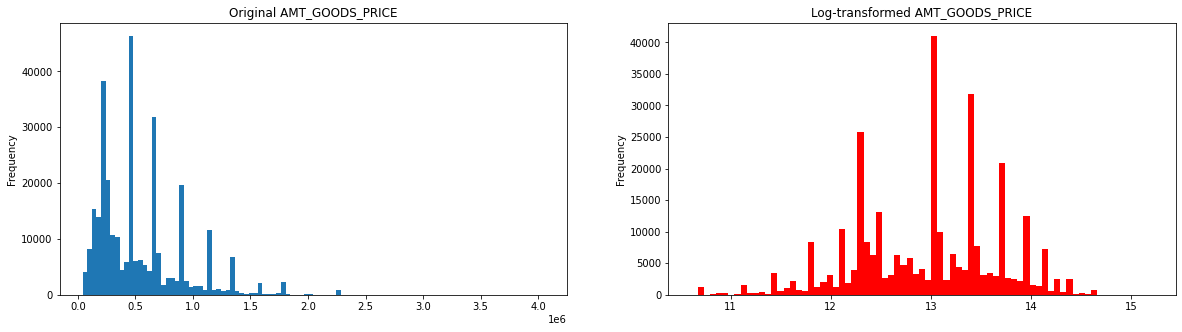

In [275]:
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']:  
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    ax = ax.flatten()
    
    train[col].plot(kind='hist', bins=100, ax=ax[0])
    ax[0].set_title('Original ' + col)
    
    try:
        train[col].apply(np.log).plot(kind='hist', color='r', bins=75, ax=ax[1])
        ax[1].set_title('Log-transformed ' + col)
    except ValueError:
        print('Feature includes zero(s):' + col)
        
    plt.show()

Remove and reduce the skewness, dynamic range of variables, of the original data to follow the bell curve.

### Flag features

In [276]:
train['FLAG_CG_ratio'] = train['AMT_CREDIT'] > train['AMT_GOODS_PRICE']                 # FLAG if borrower borrowed more than the price of the good

### Create new features

In [277]:
# ratio features - create new variables based on existing variables
train['CI_ratio'] = train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']        # credit-to-income ratio
train['AI_ratio'] = train['AMT_ANNUITY'] / train['AMT_INCOME_TOTAL']       # annuity-to-income ratio
train['GI_ratio'] = train['AMT_GOODS_PRICE'] / train['AMT_INCOME_TOTAL']         # credit to goods price ratio - how much was financed?

In [278]:
# EXT_SOURCE_x variables are very important - let's not leave missing values up to the imputer!
# Instead of imputing missing values by column mean or median, let's fill in missing values by row
# i.e. missing scores are replaced with the average of the scores we do have. If there are no scores at all
# let's just give them a value of 0.2 for now.
train['AVG_EXT'] = train.iloc[:, 41:44].sum(axis=1)/(3- train.iloc[:,41:44].isnull().sum(axis=1))   # average of the (at most) three scores
train['AVG_EXT'].replace(np.nan, 0.2, inplace = True)   # get rid of any /0 errors generated from previous step

train.EXT_SOURCE_1.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_2.fillna(train.AVG_EXT, inplace=True)
train.EXT_SOURCE_3.fillna(train.AVG_EXT, inplace=True)

train.drop(['AVG_EXT'], axis = 1)   # let's not make AVG_EXT a feature - it will be too highly correlated to the three components



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,FLAG_CG_ratio,CI_ratio,AI_ratio,GI_ratio
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,1.0,True,2.007889,0.121978,1.733333
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,True,4.790750,0.132217,4.183333
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,False,2.000000,0.100000,2.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,True,2.316167,0.219900,2.200000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,False,4.222222,0.179963,4.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,NaN,NaN,NaN,NaN,NaN,NaN,True,1.617143,0.174971,1.428571
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,NaN,NaN,NaN,NaN,NaN,NaN,True,3.743750,0.166687,3.125000
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,1.0,0.0,0.0,1.0,0.0,1.0,True,4.429176,0.195941,3.823529
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,0.0,0.0,0.0,0.0,True,2.164368,0.118158,1.868421


## Split data into train data and test data

In [279]:
y = train['TARGET'].values
X_train, X_valid, y_train, y_valid = train_test_split(train.drop(['TARGET', 'SK_ID_CURR'], axis = 1), y, stratify = y, test_size=0.8, random_state=1)
print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of X_valid:',X_valid.shape)
print('Shape of y_valid:',y_valid.shape)

Shape of X_train: (61502, 125)
Shape of y_train: (61502,)
Shape of X_valid: (246009, 125)
Shape of y_valid: (246009,)


## Transform Data - Impute, Scale, One Hot Encode for categorial columns

In [280]:
types = np.array([z for z in X_train.dtypes])        # array([dtype('float64'), dtype('float64'), dtype('O'), dtype('O') ...])
all_columns = X_train.columns.values                 # list of all column names
is_num = types != 'object'                           # returns array([False, False, False, False,  True,  True, ...) where True is a numeric variable
num_features = all_columns[is_num].tolist()          # list of all numeric columns
cat_features = all_columns[~is_num].tolist()         # list of all categorical columns

print(len(num_features), "numeric features")
print(len(cat_features), "categorical features")

109 numeric features
16 categorical features


In [281]:
features = num_features + cat_features

Pipe_num = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy = 'median')),        # tried median, mean, constant strategies
    ('scaler', StandardScaler())       ])

Pipe_cat = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Unknown')),
    ('onehot', OneHotEncoder())        ])

preprocessor = ColumnTransformer(
    transformers = [
        ('num', Pipe_num, num_features),
        ('cat', Pipe_cat, cat_features)])

preprocessor.fit(train[features])
X_train = preprocessor.transform(X_train[features])
X_valid = preprocessor.transform(X_valid[features])


print('Shape of X_train:',X_train.shape)
print('Shape of y_train:',y_train.shape)

Shape of X_train: (61502, 255)
Shape of y_train: (61502,)


## Build models

In [282]:
## DecisionTree
model_dt = DecisionTreeClassifier(random_state = 1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [283]:
predictions_dt = model_dt.predict(X_valid)
print("DecisionTreeClassifier", accuracy_score(y_valid, predictions_dt))

DecisionTreeClassifier 0.8509078936136483


In [284]:
## LogisticRegression
model_lr = LogisticRegression(max_iter=2000, solver = 'lbfgs', multi_class='auto')
model_lr.fit(X_train, y_train)



LogisticRegression(max_iter=2000)

In [285]:
predictions_lr = model_lr.predict(X_valid)
print("LogisticRegression", accuracy_score(y_valid, predictions_lr))

LogisticRegression 0.919149299415875


In [286]:
## RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [287]:
predictions_rf = model_rf.predict(X_valid)
print("RandomForestClassifier", accuracy_score(y_valid, predictions_rf))

RandomForestClassifier 0.9192671812819856


## Evaluate the model

In [288]:
# Todo 
# Confusion matrix 
matrix_dt = confusion_matrix(y_valid, predictions_dt, labels=[1,0])
matrix_lr = confusion_matrix(y_valid, predictions_lr, labels=[1,0])
matrix_rf = confusion_matrix(y_valid, predictions_rf, labels=[1,0])


# Precision score

precision_dt = precision_score(y_valid, predictions_dt, average = 'binary')
precision_lr = precision_score(y_valid, predictions_lr, average = 'binary')
precision_rf = precision_score(y_valid, predictions_rf, average = 'binary')

# Recall Score

recall_dt = precision_score(y_valid, predictions_dt, average = 'binary')
recall_lr = precision_score(y_valid, predictions_lr, average = 'binary')
recall_rf = precision_score(y_valid, predictions_rf, average = 'binary')

# F1 Score

f1_dt = precision_score(y_valid, predictions_dt, average = 'binary')
f1_lr = precision_score(y_valid, predictions_lr, average = 'binary')
f1_rf = precision_score(y_valid, predictions_lr, average = 'binary')

print('Decision Tree Classifier: \n')
print('Confusion Matrix\n', matrix_dt, '\n')
print('Precision Score', precision_dt, '\n')
print('Recall Score', recall_dt, '\n')
print('F1 Score', f1_dt, '\n')

print('Logistic Regression: \n')
print('Confusion Matrix \n', matrix_lr, '\n')
print('Precision Score', precision_lr, '\n')
print('Recall Score', recall_lr, '\n')
print('F1 Score', f1_lr, '\n')

print('Random Forest Classifier: \n')
print('Confusion Matrix\n', matrix_rf, '\n')
print('Precision Score', precision_rf, '\n')
print('Recall Score', recall_rf, '\n')
print('F1 Score', f1_rf, '\n')


Decision Tree Classifier: 

Confusion Matrix
 [[  3146  16714]
 [ 19964 206185]] 

Precision Score 0.13613154478580702 

Recall Score 0.13613154478580702 

F1 Score 0.13613154478580702 

Logistic Regression: 

Confusion Matrix 
 [[   256  19604]
 [   286 225863]] 

Precision Score 0.47232472324723246 

Recall Score 0.47232472324723246 

F1 Score 0.47232472324723246 

Random Forest Classifier: 

Confusion Matrix
 [[     9  19851]
 [    10 226139]] 

Precision Score 0.47368421052631576 

Recall Score 0.47368421052631576 

F1 Score 0.47232472324723246 



In [289]:
# DecisionTreeClassifier
print('DecisionTreeClassifier %.4f' % accuracy_score(y_valid, predictions_dt))

# LogisticRegression
print('LogisticRegression %.4f' % accuracy_score(y_valid, predictions_lr))

DecisionTreeClassifier 0.8509
LogisticRegression 0.9191


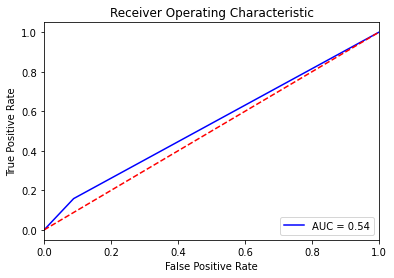

In [290]:
# ROC Curve - DecisionTreeClassifier

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


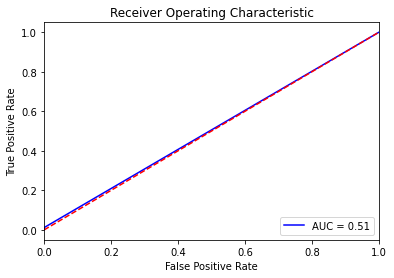

In [291]:
# ROC Curve - LogisticRegression

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_lr)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [292]:
# Todo
# Share code in Github
print(roc_auc_score(y_valid, predictions_lr))

0.5058127893356517


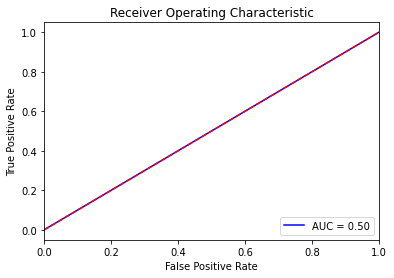

In [293]:
# ROC Curve - RandomForestClassifier

fpr, tpr, threshold = metrics.roc_curve(y_valid, predictions_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.xlim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()